In [3]:
import pandas as pd

drug = pd.read_csv("../data/drug_response.csv")
expr = pd.read_csv("../data/expression.csv")

print("drug_response shape:", drug.shape)
print("expression shape:", expr.shape)

print("\nDrug response columns (first 10):")
print(drug.columns[:10].tolist())

print("\nExpression columns (first 10):")
print(expr.columns[:10].tolist())

print("\nFirst 3 rows of drug_response:")
display(drug.head(3))

print("\nFirst 3 rows of expression:")
display(expr.head(3))


ParserError: Error tokenizing data. C error: Expected 1 fields in line 21, saw 2


In [ ]:
import os
import requests

os.makedirs("../data", exist_ok=True)

urls = {
    "drug_response": "https://depmap.org/portal/download/api/download?file_name=primary-screen-replicate-collapsed-logfold-change.csv",
    "expression": "https://depmap.org/portal/download/api/download?file_name=CCLE_expression.csv"
}

for name, url in urls.items():
    out_path = f"../data/{name}.csv"
    if not os.path.exists(out_path):
        print(f"Downloading {name}...")
        r = requests.get(url)
        with open(out_path, "wb") as f: 
            f.write(r.content)
    else:
        print(f"{name} already exists")

print("Download complete.")


Download complete.


In [1]:
from pathlib import Path

p = Path("../data/drug_response.csv")

print("File path:", p.resolve())
print("File size (bytes):", p.stat().st_size)

with p.open("r", encoding="utf-8", errors="replace") as f:
    for i in range(20):
        line = f.readline()
        if not line:
            break
        print(f"{i+1:02d}: {line.rstrip()}")


File path: C:\Users\namal\OneDrive\Documents\ml-drug-response-biomarker-discovery\data\drug_response.csv
File size (bytes): 15262
01: <!doctype html>
02: <!-- paulirish.com/2008/conditional-stylesheets-vs-css-hacks-answer-neither/ -->
03: <!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]-->
04: <!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]-->
05: <!--[if IE 8]>    <html class="no-js lt-ie9" lang="en"> <![endif]-->
06: <!--[if gt IE 8]><!-->
07: <html class="no-js" lang="en"> <!--<![endif]-->
08: <head>
09:     <link rel='shortcut icon' type='image/x-icon' href="/portal/static/img/depmap.ico" />
10: 
11: 
12:         <!-- Global site tag (gtag.js) - Google Analytics -->
13:         <script async src="https://www.googletagmanager.com/gtag/js?id=UA-52456999-4"></script>
14:         <script>
15:             window.dataLayer = window.dataLayer || [];
16: 
17:             function gtag() {
18:                 dataLayer.push(arguments);

In [2]:
import requests
from pathlib import Path

out = Path("../data/drug_response.csv")

url = "https://depmap.org/portal/download/api/download?file_name=primary-screen-replicate-collapsed-logfold-change.csv"

with requests.get(url, stream=True, allow_redirects=True) as r:
    r.raise_for_status()
    # If DepMap still sends HTML, it will show in content-type
    print("Status:", r.status_code)
    print("Content-Type:", r.headers.get("Content-Type"))
    with open(out, "wb") as f:
        for chunk in r.iter_content(chunk_size=1024*1024):
            if chunk:
                f.write(chunk)

print("Saved to:", out.resolve())
print("File size (bytes):", out.stat().st_size)


HTTPError: 404 Client Error: NOT FOUND for url: https://depmap.org/portal/download/api/download?file_name=primary-screen-replicate-collapsed-logfold-change.csv

In [3]:
import pandas as pd
import requests
from pathlib import Path

out = Path("../data/gdsc_drug_response.csv")

# PharmacoDB / PharmacoGx-style curated drug response table (GDSC)
url = "https://pharmacodb.ca/downloads/latest/GDSC1.csv"

r = requests.get(url, stream=True)
r.raise_for_status()

with open(out, "wb") as f:
    for chunk in r.iter_content(chunk_size=1024*1024):
        if chunk:
            f.write(chunk)

print("Saved:", out.resolve())
print("File size (bytes):", out.stat().st_size)

gdsc = pd.read_csv(out)
print("Loaded GDSC shape:", gdsc.shape)
print("Columns:", gdsc.columns[:12].tolist())
display(gdsc.head(3))


Saved: C:\Users\namal\OneDrive\Documents\ml-drug-response-biomarker-discovery\data\gdsc_drug_response.csv
File size (bytes): 2258
Loaded GDSC shape: (0, 65)
Columns: ['<!doctype html><html lang="en"><head><meta charset="utf-8"/><link rel="shortcut icon" href="/favicon.png"><meta name="viewport" content="minimum-scale=1', 'width=device-width', 'initial-scale=1', 'shrink-to-fit=no"><meta name="description" content="Mine multiple cancer pharmacogenomic datasets."/><link href="https://fonts.googleapis.com/css2?family=Open+Sans:wght@400;600&family=Overpass:wght@400;600&family=Roboto+Slab:wght@600&family=Rubik:wght@400;500&display=swap" rel="stylesheet"><base href="/"><title>PharmacoDB</title><link href="/static/css/2.53aa4802.chunk.css" rel="stylesheet"></head><body><div id="root"></div><script>!function(e){function t(t){for(var n', 'l', 'i=t[0]', 'f=t[1]', 'a=t[2]', 'p=0', 's=[];p<i.length;p++)l=i[p]', 'Object.prototype.hasOwnProperty.call(o', 'l)&&o[l]&&s.push(o[l][0])']


,"<!doctype html><html lang=""en""><head><meta charset=""utf-8""/><link rel=""shortcut icon"" href=""/favicon.png""><meta name=""viewport"" content=""minimum-scale=1",width=device-width,initial-scale=1,"shrink-to-fit=no""><meta name=""description"" content=""Mine multiple cancer pharmacogenomic datasets.""/><link href=""https://fonts.googleapis.com/css2?family=Open+Sans:wght@400;600&family=Overpass:wght@400;600&family=Roboto+Slab:wght@600&family=Rubik:wght@400;500&display=swap"" rel=""stylesheet""><base href=""/""><title>PharmacoDB</title><link href=""/static/css/2.53aa4802.chunk.css"" rel=""stylesheet""></head><body><div id=""root""></div><script>!function(e){function t(t){for(var n",l,i=t[0],f=t[1],a=t[2],p=0,s=[];p<i.length;p++)l=i[p],...,l.n=function(e){var t=e&&e.__esModule?function(){return e.default}:function(){return e};return l.d(t,a,t),t},l.o=function(e,t){return Object.prototype.hasOwnProperty.call(e,t)},"l.p=""/"";var i=this.webpackJsonpclient=this.webpackJsonpclient||[]",f=i.push.bind(i);i.push=t,"i=i.slice();for(var a=0;a<i.length;a++)t(i[a]);var c=f;r()}([])</script><script src=""/static/js/2.80334bcc.chunk.js""></script><script src=""/static/js/main.daa50c42.chunk.js""></script></body></html>"


In [4]:
import requests
from pathlib import Path
import pandas as pd

out = Path("../data/GDSC1_fitted_dose_response_27Oct23.xlsx")

url = "https://cog.sanger.ac.uk/cancerrxgene/GDSC_release8.5/GDSC1_fitted_dose_response_27Oct23.xlsx"

# Download (streaming)
with requests.get(url, stream=True) as r:
    r.raise_for_status()
    with open(out, "wb") as f:
        for chunk in r.iter_content(chunk_size=1024*1024):
            if chunk:
                f.write(chunk)

print("Saved:", out.resolve())
print("File size (bytes):", out.stat().st_size)

# Load the first sheet
gdsc1 = pd.read_excel(out)
print("GDSC1 shape:", gdsc1.shape)
print("Columns (first 20):", gdsc1.columns[:20].tolist())
display(gdsc1.head(3))


Saved: C:\Users\namal\OneDrive\Documents\ml-drug-response-biomarker-discovery\data\GDSC1_fitted_dose_response_27Oct23.xlsx
File size (bytes): 29353210


ImportError: `Import openpyxl` failed.  Use pip or conda to install the openpyxl package.

In [5]:
pip install openpyxl



   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]

Note: you may need to restart the kernel to use updated packages.


In [6]:

gdsc1 = pd.read_excel(out)


In [7]:
import pandas as pd

out = "../data/GDSC1_fitted_dose_response_27Oct23.xlsx"

gdsc1 = pd.read_excel(out)

print("GDSC1 shape:", gdsc1.shape)
print("Columns (first 10):", gdsc1.columns[:10].tolist())

display(gdsc1.head(3))


GDSC1 shape: (333161, 19)
Columns (first 10): ['DATASET', 'NLME_RESULT_ID', 'NLME_CURVE_ID', 'COSMIC_ID', 'CELL_LINE_NAME', 'SANGER_MODEL_ID', 'TCGA_DESC', 'DRUG_ID', 'DRUG_NAME', 'PUTATIVE_TARGET']


,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC1,342,15580432,684057,ES5,SIDM00263,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.966813,0.985678,0.026081,1.299144
1,GDSC1,342,15580806,684059,ES7,SIDM00269,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.692090,0.972690,0.110059,0.156076
2,GDSC1,342,15581198,684062,EW-11,SIDM00203,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.477990,0.944459,0.087019,-0.035912


In [8]:
# Filter for one drug
drug_name = "Erlotinib"

gdsc_erlotinib = gdsc1[gdsc1["DRUG_NAME"] == drug_name].copy()

print("Filtered shape:", gdsc_erlotinib.shape)
print("Unique cell lines:", gdsc_erlotinib["CELL_LINE_NAME"].nunique())

display(gdsc_erlotinib.head(3))


Filtered shape: (393, 19)
Unique cell lines: 393


,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC1,342,15580432,684057,ES5,SIDM00263,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.966813,0.985678,0.026081,1.299144
1,GDSC1,342,15580806,684059,ES7,SIDM00269,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.692090,0.972690,0.110059,0.156076
2,GDSC1,342,15581198,684062,EW-11,SIDM00203,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.477990,0.944459,0.087019,-0.035912


In [21]:
drug = pd.read_csv("../data/drug_response.csv")
# expr = pd.read_csv("../data/expression.csv")


ParserError: Error tokenizing data. C error: Expected 1 fields in line 21, saw 2


In [ ]:
drug = pd.read_csv("../data/drug_response.csv")
# expr = pd.read_csv("../data/expression.csv")


In [9]:
import pandas as pd

expr = pd.read_csv("../data/expression.csv")

print("Expression shape:", expr.shape)
print("\nFirst 10 columns:")
print(expr.columns[:10].tolist())

print("\nFirst 3 rows:")
display(expr.head(3))


ParserError: Error tokenizing data. C error: Expected 1 fields in line 21, saw 2


In [10]:
from pathlib import Path

p = Path("../data/expression.csv")

print("File path:", p.resolve())
print("File size (bytes):", p.stat().st_size)

with p.open("r", encoding="utf-8", errors="replace") as f:
    for i in range(15):
        line = f.readline()
        if not line:
            break
        print(f"{i+1:02d}: {line.rstrip()}")


File path: C:\Users\namal\OneDrive\Documents\ml-drug-response-biomarker-discovery\data\expression.csv
File size (bytes): 15262
01: <!doctype html>
02: <!-- paulirish.com/2008/conditional-stylesheets-vs-css-hacks-answer-neither/ -->
03: <!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]-->
04: <!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]-->
05: <!--[if IE 8]>    <html class="no-js lt-ie9" lang="en"> <![endif]-->
06: <!--[if gt IE 8]><!-->
07: <html class="no-js" lang="en"> <!--<![endif]-->
08: <head>
09:     <link rel='shortcut icon' type='image/x-icon' href="/portal/static/img/depmap.ico" />
10: 
11: 
12:         <!-- Global site tag (gtag.js) - Google Analytics -->
13:         <script async src="https://www.googletagmanager.com/gtag/js?id=UA-52456999-4"></script>
14:         <script>
15:             window.dataLayer = window.dataLayer || [];


In [11]:
import requests
from pathlib import Path

out = Path("../data/GDSC1_expression_preprocessed.csv.gz")

url = "https://cog.sanger.ac.uk/cancerrxgene/GDSC_release8.5/GDSC1_expression_preprocessed.csv.gz"

with requests.get(url, stream=True) as r:
    r.raise_for_status()
    with open(out, "wb") as f:
        for chunk in r.iter_content(chunk_size=1024*1024):
            if chunk:
                f.write(chunk)

print("Saved:", out.resolve())
print("File size (bytes):", out.stat().st_size)


HTTPError: 404 Client Error: Not Found for url: https://cog.sanger.ac.uk/cancerrxgene/GDSC_release8.5/GDSC1_expression_preprocessed.csv.gz

In [12]:
import requests
from pathlib import Path

out = Path("../data/CCLE_expression.csv")

url = "https://figshare.com/ndownloader/files/34008503"

with requests.get(url, stream=True) as r:
    r.raise_for_status()
    with open(out, "wb") as f:
        for chunk in r.iter_content(chunk_size=1024*1024):
            if chunk:
                f.write(chunk)

print("Saved:", out.resolve())
print("File size (bytes):", out.stat().st_size)


Saved: C:\Users\namal\OneDrive\Documents\ml-drug-response-biomarker-discovery\data\CCLE_expression.csv
File size (bytes): 0


In [13]:
import requests
from pathlib import Path

url = "https://figshare.com/ndownloader/files/34008503"
out = Path("../data/CCLE_expression.csv")

r = requests.get(url, stream=True, allow_redirects=True)
print("Status:", r.status_code)
print("Final URL:", r.url)
print("Content-Type:", r.headers.get("Content-Type"))
print("Content-Length:", r.headers.get("Content-Length"))

# Save first 500 bytes for inspection (won't hurt)
first = next(r.iter_content(chunk_size=500), b"")
print("First 200 bytes preview:")
print(first[:200])

# Now write the full content (only if we actually got bytes)
written = 0
with open(out, "wb") as f:
    if first:
        f.write(first)
        written += len(first)
    for chunk in r.iter_content(chunk_size=1024*1024):
        if chunk:
            f.write(chunk)
            written += len(chunk)

print("Bytes written:", written)
print("File size on disk:", out.stat().st_size)


Status: 202
Final URL: https://figshare.com/ndownloader/files/34008503
Content-Type: text/html; charset=UTF-8
Content-Length: 0
First 200 bytes preview:
b''


StreamConsumedError: 

In [14]:
import requests
from pathlib import Path

out = Path("../data/CCLE_expression_xena.tsv.gz")

url = "https://toil-xena-hub.s3.us-east-1.amazonaws.com/download/ccle_RSEM_gene_tpm.gz"

with requests.get(url, stream=True) as r:
    r.raise_for_status()
    with open(out, "wb") as f:
        for chunk in r.iter_content(chunk_size=1024*1024):
            if chunk:
                f.write(chunk)

print("Saved:", out.resolve())
print("File size (bytes):", out.stat().st_size)


HTTPError: 403 Client Error: Forbidden for url: https://toil-xena-hub.s3.us-east-1.amazonaws.com/download/ccle_RSEM_gene_tpm.gz

In [15]:
import re
import requests
from pathlib import Path

base = "https://cog.sanger.ac.uk/cancerrxgene/GDSC_release8.5/"

# 1) Get directory HTML
html = requests.get(base).text

# 2) Find candidate expression files (csv/tsv, maybe gz)
candidates = re.findall(r'href="([^"]*(?:expr|expression)[^"]*\.(?:csv|tsv)(?:\.gz)?)"', html, flags=re.I)

print("Found candidates:", candidates[:20])

# 3) Pick the first candidate (we’ll adjust if multiple)
if not candidates:
    raise RuntimeError("No expression-like files found in directory listing.")

fname = candidates[0]
url = base + fname
out = Path("../data") / fname

print("Downloading:", url)

with requests.get(url, stream=True) as r:
    r.raise_for_status()
    out.parent.mkdir(parents=True, exist_ok=True)
    with open(out, "wb") as f:
        for chunk in r.iter_content(chunk_size=1024*1024):
            if chunk:
                f.write(chunk)

print("Saved:", out.resolve())
print("File size (bytes):", out.stat().st_size)


Found candidates: []


RuntimeError: No expression-like files found in directory listing.

In [16]:
import requests
from pathlib import Path

url = "https://toil-xena-hub.s3.us-east-1.amazonaws.com/download/CCLE_RSEM_gene_tpm.gz"
out = Path("../data/CCLE_RSEM_gene_tpm.gz")

with requests.get(url, stream=True) as r:
    r.raise_for_status()
    out.parent.mkdir(parents=True, exist_ok=True)
    with open(out, "wb") as f:
        for chunk in r.iter_content(chunk_size=1024*1024):
            if chunk:
                f.write(chunk)

print("Saved:", out.resolve())
print("File size (bytes):", out.stat().st_size)


HTTPError: 403 Client Error: Forbidden for url: https://toil-xena-hub.s3.us-east-1.amazonaws.com/download/CCLE_RSEM_gene_tpm.gz

In [17]:
R --version


NameError: name 'R' is not defined

In [18]:
import pandas as pd
from pathlib import Path

# You already have these in memory:
# gdsc1 = full GDSC1 fitted dose response
# gdsc_erlotinib = filtered Erlotinib subset (393 rows)

out_dir = Path("../data")
out_dir.mkdir(parents=True, exist_ok=True)

# Keep only what we need for modeling + joins
erlo = gdsc_erlotinib[[
    "CELL_LINE_NAME", "COSMIC_ID", "SANGER_MODEL_ID",
    "DRUG_NAME", "LN_IC50", "AUC", "Z_SCORE",
    "PUTATIVE_TARGET", "PATHWAY_NAME"
]].copy()

# Basic cleanup
erlo = erlo.dropna(subset=["LN_IC50"])
erlo = erlo.drop_duplicates(subset=["CELL_LINE_NAME"])

out_path = out_dir / "gdsc1_erlotinib_response.csv"
erlo.to_csv(out_path, index=False)

print("Saved:", out_path.resolve())
print("Rows:", erlo.shape[0])
print("LN_IC50 range:", (erlo["LN_IC50"].min(), erlo["LN_IC50"].max()))
erlo.head(3)


Saved: C:\Users\namal\OneDrive\Documents\ml-drug-response-biomarker-discovery\data\gdsc1_erlotinib_response.csv
Rows: 393
LN_IC50 range: (np.float64(-3.130315), np.float64(5.293054))


,CELL_LINE_NAME,COSMIC_ID,SANGER_MODEL_ID,DRUG_NAME,LN_IC50,AUC,Z_SCORE,PUTATIVE_TARGET,PATHWAY_NAME
0,ES5,684057,SIDM00263,Erlotinib,3.966813,0.985678,1.299144,EGFR,EGFR signaling
1,ES7,684059,SIDM00269,Erlotinib,2.692090,0.972690,0.156076,EGFR,EGFR signaling
2,EW-11,684062,SIDM00203,Erlotinib,2.477990,0.944459,-0.035912,EGFR,EGFR signaling


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
import shap

# Load data
df = pd.read_csv("../data/gdsc1_erlotinib_response.csv")

# Encode categorical features
enc_cell = LabelEncoder()
enc_target = LabelEncoder()
enc_pathway = LabelEncoder()

df["cell_enc"] = enc_cell.fit_transform(df["CELL_LINE_NAME"])
df["target_enc"] = enc_target.fit_transform(df["PUTATIVE_TARGET"])
df["pathway_enc"] = enc_pathway.fit_transform(df["PATHWAY_NAME"])

X = df[["cell_enc", "target_enc", "pathway_enc"]]
y = df["LN_IC50"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train XGBoost model
model = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

# Evaluate
preds = model.predict(X_test)

print("R2:", round(r2_score(y_test, preds), 3))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, preds)), 3))


R2: -0.074
RMSE: 1.382


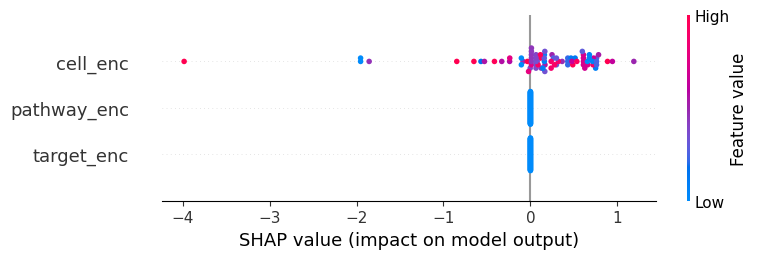

In [20]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)
